In [3]:
import pandas as pd
import numpy as np
import requests
from io import BytesIO
import zipfile
import os
import csv

In [4]:
# Specify the URL to the ZIP file
zip_file_url = 'https://github.com/dbdmg/data-science-lab/raw/master/datasets/NYC_POIs.zip'

# Download the ZIP file content
response = requests.get(zip_file_url)

# Check if the request was successful
if response.status_code == 200:
    # Extract all files from the zip archive in memory
    with zipfile.ZipFile(BytesIO(response.content)) as zip_ref:
        # Extract all files to a temporary location
        zip_ref.extractall('pd')  # Change 'path/to/extract' to your desired extraction location

        # Get the list of CSV files in the extracted folder
        tsv_files = [f for f in zip_ref.namelist() if f.endswith('.tsv')]

        # Read each CSV file into a Pandas DataFrame
        dfs = [pd.read_csv(BytesIO(zip_ref.read(tsv_file))) for tsv_file in tsv_files]

    # Now 'dfs' is a list containing Pandas DataFrames for each CSV file
    # You can access them individually, for example: dfs[0], dfs[1], dfs[2]
else:
    print(f"Failed to download the ZIP file. Status code: {response.status_code}")

In [6]:
# Obtener la ruta del script actual
directorio_actual = os.getcwd()

# Construir la ruta al archivo CSV relativa al directorio actual
ruta_csv = os.path.join(directorio_actual, 'pd', 'ny_municipality_pois_id.csv')
"""
# Leer el archivo CSV
with open(ruta_csv, 'r') as archivo_csv:
    lector_csv = csv.reader(archivo_csv)
    for fila in lector_csv:
        print(fila)
"""
ny=pd.read_csv(ruta_csv,header=None)

In [7]:
ny.shape

(53530, 1)

In [8]:
ny.rename(columns={0:'@id'},inplace=True)

In [9]:
ruta_csv=os.path.join(directorio_actual, 'pd', 'pois_all_info')
inf=pd.read_csv(ruta_csv,sep="\t",low_memory=False,usecols=['@id', '@type', '@lat', '@lon', 'amenity name', 'shop',
       'public_transport', 'highway'])

ValueError: Usecols do not match columns, columns expected but not found: ['amenity name']

In [ ]:
inf.columns

Index(['@id', '@type', '@lat', '@lon', 'amenity', 'name', 'shop',
       'public_transport', 'highway'],
      dtype='object')

In [ ]:
inf.shape

(77884, 9)

In [ ]:
data=pd.merge(ny,inf,how='left',on='@id')

In [ ]:
data.shape#It has the rows of ny and the columns of inf

(53550, 9)

In [ ]:
data.columns #I have another column= the column @type

Index(['@id', '@type', '@lat', '@lon', 'amenity', 'name', 'shop',
       'public_transport', 'highway'],
      dtype='object')

In [ ]:
data.isna().sum()  #The nulls values are because the pois that are not amenity are shop and so on .
"""Most of the points of interest are in the cathegory amenity(servicios)"""

@id                     0
@type                   0
@lat                    0
@lon                    0
amenity             28838
name                23000
shop                44833
public_transport    45174
highway             45991
dtype: int64

In [ ]:
data.dtypes 

@id                   int64
@type                object
@lat                float64
@lon                float64
amenity              object
name                 object
shop                 object
public_transport     object
highway              object
dtype: object

In [ ]:
data.head()

,@id,@type,@lat,@lon,amenity,name,shop,public_transport,highway
0,42432939,node,40.814104,-73.949623,NaN,NaN,NaN,stop_position,NaN
1,42448838,node,40.761647,-73.949864,NaN,NaN,NaN,stop_position,NaN
2,42723103,node,40.852182,-73.772677,ferry_terminal,Hart Island Ferry Terminal,NaN,NaN,NaN
3,42764076,node,40.867164,-73.882158,NaN,Botanical Garden,NaN,stop_position,NaN
4,42811266,node,40.704806,-73.772734,NaN,NaN,NaN,stop_position,NaN


In [ ]:
ix=pd.IndexSlice
histo=data.loc[:,ix['amenity','shop','public_transport','highway']]

In [ ]:
histo.iloc[:,]

,amenity,shop,public_transport
0,NaN,NaN,stop_position
1,NaN,NaN,stop_position
2,ferry_terminal,NaN,NaN
3,NaN,NaN,stop_position
4,NaN,NaN,stop_position
...,...,...,...
53545,NaN,NaN,NaN
53546,NaN,NaN,NaN
53547,NaN,NaN,NaN
53548,NaN,NaN,NaN


In [ ]:
histo.columns[2]

'public_transport'

In [10]:
position=[]
value=[]
for i in histo.columns:
    for j in histo.index:
        if histo.iloc[i,j]!=None: 
            position.append(histo.columns[i])
            value.append(histo.iloc[i,j])
            break
    
        histo.fillna(0)

NameError: name 'histo' is not defined

In [ ]:
value

[nan, nan, 'ferry_terminal', nan]

In [ ]:
position

['amenity', 'shop', 'public_transport', 'highway']

In [ ]:
histo

,amenity,shop,public_transport,highway
0,NaN,NaN,stop_position,NaN
1,NaN,NaN,stop_position,NaN
2,ferry_terminal,NaN,NaN,NaN
3,NaN,NaN,stop_position,NaN
4,NaN,NaN,stop_position,NaN
...,...,...,...,...
53545,NaN,NaN,NaN,NaN
53546,NaN,NaN,NaN,NaN
53547,NaN,NaN,NaN,NaN
53548,NaN,NaN,NaN,NaN


<AxesSubplot: >

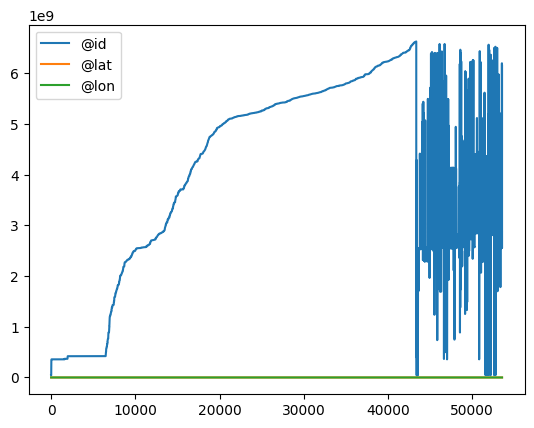

In [ ]:
#Histogram with pandas for the 
data.plot()

TypeError: saludar() missing 1 required positional argument: 'tipo'